# **Rèplica primera sessió - càrrega de dades**

In [ ]:
# Atajos útils:
# Ctrl + / --> comentar (en el numeric pad!)
# Ctrl + ç --> comentar tb

Primerament instal·lem un parell de ferramentes útils

In [ ]:
pip install -r requirements.txt
pip install lckr-jupyterlab-variableinspector

Repliquem el mecanisme de càlcul de temps d'execució

In [ ]:
# Examen d'eficiència
startTime = time.time()
alltr = pd.read_csv(r"D:\OneDrive\Universitat\5. Quart'\TFG\RstudioPython\Dades\Normal\all_train.csv")
endTime = time.time()
print(endTime-startTime)

# Tarda 63 segons! La meitat que el segon mecanisme en R.

In [ ]:
# f1000a = open(r"D:/OneDrive/Universitat/5. Quart'/TFG/RstudioPython/Dades/NoNormalTrue/xttbar_m1000_aug17.txt", mode ='r')
# f1000b = open(r"D:/OneDrive/Universitat/5. Quart'/TFG/RstudioPython/Dades/NoNormalTrue/xttbar_m1000_aug4.txt", mode ='r')
# readme = open(r"D:/OneDrive/Universitat/5. Quart'/TFG/RstudioPython/Dades/NoNormalTrue/xttbar_m1000_aug4.txt")
# lineslist = readme.readlines()
# cols, rows = (int(val) for val in lines_list[0].split())

In [ ]:
# Seleccionem únicament les dades signal/background
milTrSignal = alltr.loc[(alltr["mass"] == 1000) & (alltr["# label"] == 1)]
milTrBackground = alltr.loc[(alltr["mass"] == 1000) & (alltr["# label"] == 0)]
# adult_names = titanic.loc[titanic["Age"] > 35, "Name"]

# Error detectat: & té major prioritat que ==, així que cal emprar parèntesis!

In [ ]:
del(allTrBackground, allTrSignal) # Mètode per eliminar variables

## Càrrega de dades final

In [ ]:
# Cel·la definitiva - càrrega de dades
import pandas as pd
import numpy as np
import time

alltr = pd.read_csv(r"D:\OneDrive\Universitat\5. Quart'\TFG\RstudioPython\Dades\Normal\all_train.csv")
miltr = pd.read_csv(r"D:\OneDrive\Universitat\5. Quart'\TFG\RstudioPython\Dades\Normal\1000_train.csv")

In [ ]:
# Trunquem les dades, seleccionem únicament 10 000. A més, la separem en la informació coneguda i la que pretenem predir.
Xdata = np.array(miltr.loc[:,["f0","f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20","f21"]])
# Ydata = np.array(miltr.loc[:,"# label"])
Ydata = np.array(miltr.index)[1:10001]
Xdata = Xdata[0:10000,:]

In [ ]:
print(Xdata)

In [ ]:
print(miltr)

# **Segona sessió: normalització, matrius de correlació i decision trees**

## Càrrega de dades (tr i tst)

In [ ]:
import pandas as pd
import numpy as np
import time

miltr = pd.read_csv(r"D:\OneDrive\Universitat\5. Quint\TFG\RstudioPython\Dades\Normal\1000_train.csv")
miltst = pd.read_csv(r"D:\OneDrive\Universitat\5. Quint\TFG\RstudioPython\Dades\Normal\1000_test.csv")
alltr = pd.read_csv(r"D:\OneDrive\Universitat\5. Quint\TFG\RstudioPython\Dades\Normal\all_train.csv")
alltst = pd.read_csv(r"D:\OneDrive\Universitat\5. Quint\TFG\RstudioPython\Dades\Normal\all_test.csv")

# del(alltr,alltst)
# del(miltr, miltst)

## Matrius de correlació

Preprocesem les dades: seleccionem solament signal (`# label == 1`) i variables HL i pTs

In [23]:
milTrSignal = miltr.loc[miltr.index == 1]
milTrSignal = miltr.loc[:,["# label","f6","f10","f14","f18","f21","f22","f23","f24","f25"]]
milTrSignal.columns = ["Lept_pt","j1_pt","j2_pt","j3_pt","j4_pt","m_jj","m_jjj","m_lv","m_jlv","m_wwbb"]

Representem la matriu

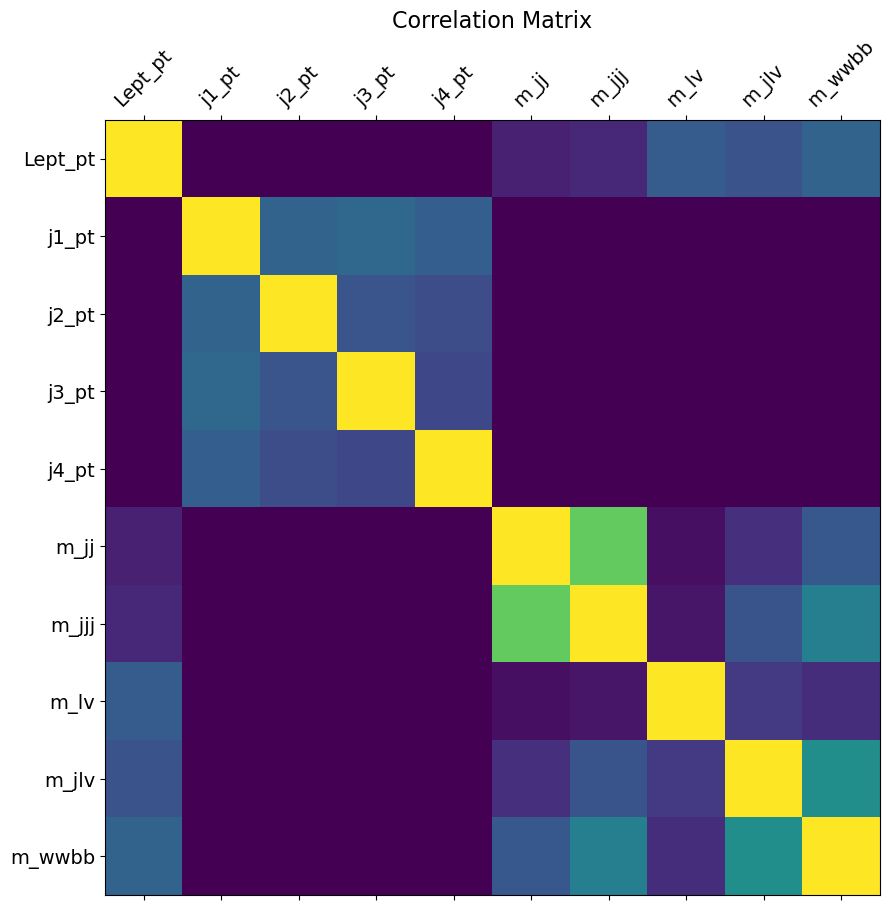

In [33]:
import matplotlib.pyplot as plt

# plt.matshow(milTrSignal.corr())
# plt.show()
f = plt.figure(figsize=(10, 10))
plt.matshow(milTrSignal.corr(), fignum=f.number)

plt.xticks(range(milTrSignal.select_dtypes(['number']).shape[1]), milTrSignal.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(milTrSignal.select_dtypes(['number']).shape[1]), milTrSignal.select_dtypes(['number']).columns, fontsize=14)

# ax=plt.gca() #get the current axes
# PCM=ax.get_children()[2]
# cb = plt.colorbar(PCM,ax=ax)
# cb.ax.tick_params(labelsize=14)

plt.title('Correlation Matrix', fontsize=16);

In [34]:
df = pd.DataFrame(milTrSignal)
corr = milTrSignal.corr()
corr.style.background_gradient(cmap='coolwarm')

,Lept_pt,j1_pt,j2_pt,j3_pt,j4_pt,m_jj,m_jjj,m_lv,m_jlv,m_wwbb
Lept_pt,1.000000,-0.000065,0.000439,-0.000164,0.000665,0.090895,0.115301,0.289434,0.253861,0.319434
j1_pt,-0.000065,1.000000,0.317722,0.332589,0.299979,0.000429,0.000596,-0.000782,-0.000133,0.000458
j2_pt,0.000439,0.317722,1.000000,0.262361,0.236009,0.000290,0.000139,-0.000703,-0.000137,0.000417
j3_pt,-0.000164,0.332589,0.262361,1.000000,0.218003,0.000233,0.000538,-0.000221,0.000119,0.000584
j4_pt,0.000665,0.299979,0.236009,0.218003,1.000000,-0.000263,-0.000567,-0.000150,0.000383,-0.000066
m_jj,0.090895,0.000429,0.000290,0.000233,-0.000263,1.000000,0.759044,0.039548,0.139457,0.276138
m_jjj,0.115301,0.000596,0.000139,0.000538,-0.000567,0.759044,1.000000,0.060612,0.258423,0.432481
m_lv,0.289434,-0.000782,-0.000703,-0.000221,-0.000150,0.039548,0.060612,1.000000,0.169085,0.131144
m_jlv,0.253861,-0.000133,-0.000137,0.000119,0.000383,0.139457,0.258423,0.169085,1.000000,0.493482
m_wwbb,0.319434,0.000458,0.000417,0.000584,-0.000066,0.276138,0.432481,0.131144,0.493482,1.000000


## Repliquem decision trees

Estudiem una mica algunes de les funcions que emprarem (`array` [bàsic de numpy], `bincount`, `arange`, `argwhere`, `flatten`)

In [ ]:
# bincount diguem-ne que fa un histograma de l'array
y = np.array([1,2,3,1,2])
np.bincount(y)

In [ ]:
# np.argwhere(condition) troba els elements que compleixen la condició
# .flatten ho transforma en vector, en comptes de llista de llistes
x = np.arange(5)
np.argwhere(x<3).flatten()

In [ ]:
# Algoritme per a Decision Trees basat en https://www.youtube.com/watch?v=NxEHSAfFlK8&list=PLcWfeUsAys2k_xub3mHks85sBHZvg24Jd&index=5
# Un parell d'ajusts, en la línia 94, afegisc un pas addicional per compatibilitzar bincounts amb les dades (float). No estic segur de si és adequat.


# L'asterisc força a passar value explícitament quan es cree un node: Node(value = blabla)
import numpy as np
from collections import Counter

class Node():
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None # Si existeix un valor, aleshores hi ha al menys un fill, per tant no és --> false
        

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)
        self.root = self._grow_tree(X,y)
        
    def _grow_tree(self, X, y, depth = 0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))
        
        # Check the stopping criteria
        if (depth>=self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)
        # Si tenim el màxim de profunditat, si tenim un node pur o arribem al mínim de mostres, no crearem més
        
        feat_idx = np.random.choice(n_feats, self.n_features, replace = False)
        
        # Find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idx) # Lloc on incloem la part aleatòria dels DT
        
        # Create child nodes
        left_idxs, right_idxs = self._split(X[:,best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs,:],y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs,:],y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)
        
        
    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None
        
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            
            for thr in thresholds:
                # Calculate Information gain
                gain = self._information_gain(y, X_column, thr)
                
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr
        
        return split_idx, split_threshold
    
    def _information_gain(self, y, X_column, threshold):
        # Parent entropy
        parent_entropy = self._entropy(y)
        
        # Create children
        left_idxs, right_idxs = self._split(X_column, threshold)
        
        if(len(left_idxs) == 0 or len(right_idxs) == 0):
           return 0
        
        # Calculate weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]),self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r    
           
        # Calculate IG
        information_gain = parent_entropy - child_entropy
        return information_gain
        
    def _entropy(self, y):
        uniq, inverse = np.unique(y, return_inverse=True) # Afegit per mi per poder fer el mateix amb floats en comptes d'int
        hist = np.bincount(inverse)
        ps = hist / len(y)
        return -np.sum([p*np.log(p) for p in ps if p > 0])
   
    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs
        
        
    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0] # Mirar en Logistic Regression
        return value
                        

    def predict(self,X):
        return np.array([self._traverse_tree(x, self.root) for x in X])
    
    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
           return node.value
           
        if x[node.feature] <= node.threshold:
           return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)



Emprem aquest DT *artesanal* amb els datasets proposats al vídeo.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

# from DecisionTree import DecisionTree

data = datasets.load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = 1234
)

clf = DecisionTree()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)
    
acc = accuracy(y_test, predictions)
print(acc)

# Jugar amb més max_depth, diferents paràmetres

In [ ]:
print(Xdata)

Intentem emprar aquest DT amb els nostres datasets. Seleccionem les columnes LL per a Xdata i els índexs per al Ydata

In [ ]:
# Prova 1: trunquem les dades, seleccionem únicamen 10 000
Xdata = np.array(miltr.loc[:,["f0","f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20","f21"]])
# Ydata = np.array(miltr.loc[:,"# label"])
Ydata = np.array(miltr.index)[1:10001]
Xdata = Xdata[0:10000,:]

In [ ]:
# Prova 2: no fem split en test i train,  
Xdata = np.array(miltr.loc[:,["f0","f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20","f21"]])
# Ydata = np.array(miltr.loc[:,"# label"])
Ydata = np.array(miltr.index)[0:50000]
Xdata = Xdata[0:50000,:]

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

startTime = time.time()

X, y = Xdata, Ydata

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1, random_state = 1234
)

clf = DecisionTree(min_samples_split = 500, max_depth=4)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)
    
acc = accuracy(y_test, predictions)
print(acc)

endTime = time.time()
print(endTime-startTime)

# Prova 1 amb 10.000 dades, None, None --> precisió de 1.0, temps d'execució ~ 15 minuts
# Prova 2 amb 100.000 dades, min_samples_split = 500, max_depth=4 --> precisió de ; temps d'execució > 4 hores, descartat

In [ ]:
print(clf.fit)

## Ferramentes sklearn

Una vegada hem replicat el codi bàsic d'un DT i hem interioritzat el procediment, emprem la llibreria sklearn, amb algoritmes més
testats i optimitzats, entenc.
El mètode anterior és ilustratiu, però inviable en termes de temps d'execució.

In [ ]:
# Prova 3: amb tots els esdeveniments
Ydata = np.array(miltr.index)
Xdata = np.array(miltr.loc[:,["f0","f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20","f21"]])

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
startTime = time.time()

clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(Xdata, Ydata)

# tree.plot_tree(clf)

endTime = time.time()
print(endTime-startTime) 

# Prova 2: 13 segons!?!?!
# Prova 3 (tots els esdeveniments, max_depth = 5): 174 segons?


# El plot del tree és un infern quan té massa depth, obviar.

In [ ]:
tree.plot_tree(clf)

Carreguem ara també les dades test per avaluar el Tree

In [ ]:
miltst = pd.read_csv(r"D:\OneDrive\Universitat\5. Quart'\TFG\RstudioPython\Dades\Normal\1000_test.csv")

In [ ]:
Ytst = np.array(miltst.iloc[:,0])
Xtst = np.array(miltst.loc[:,["# label","f0","f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20"]])

In [ ]:
# print(miltst)
# print(Xtst)
# print(Ytst)

`score` sembla que calcula la precisió mitjana (https://github.com/scikit-learn/scikit-learn/blob/093e0cf14/sklearn/base.py#L680) 

In [ ]:
acc = clf.score(Xtst, Ytst)
print(acc)

Ara, unifiquem totes les parts de l'avaluació:

0. Càrrega de dades
1. Preparació de les dades i selecció de variables
2. Càlcul del DT
3. Avaluació del DT

In [ ]:
Ydata = np.array(alltr.iloc[:,[0]])

print(Ydata)

In [ ]:
print(alltr)

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
# Part 1: definim Ydata, Ytst per a tots i Xdata, Xtst per a cada cas 
# Ydata = np.array(miltr.index)
# Ytst = np.array(miltst.iloc[:,0])

Ydata = np.array(alltr.iloc[:,[0]])
Ytst = np.array(alltst.iloc[:,0])


# a) LL 
# Xdata = np.array(miltr.loc[:,["# label","f0","f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12",
#                               "f13","f14","f15","f16","f17","f18","f19","f20"]])
# Xtst = np.array(miltst.loc[:,["# label","f0","f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12"
#                               ,"f13","f14","f15","f16","f17","f18","f19","f20"]])

# b) LL + HL 
# Xdata = np.array(miltr.loc[:,["# label","f0","f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12",
#                               "f13","f14","f15","f16","f17","f18","f19","f20","f21","f22","f23","f24","f25"]])
# Xtst = np.array(miltst.loc[:,["# label","f0","f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12",
#                               "f13","f14","f15","f16","f17","f18","f19","f20","f21","f22","f23","f24","f25"]])

# c) Selecció 1: f6 + HL
# Xdata = np.array(miltr.iloc[:,["f6","f21","f22","f23","f24","f25"]])
# Xtst = np.array(miltst.iloc[:,["f6","f21","f22","f23","f24","f25"]])

# d) Selecció 2
# Xdata = np.array(miltr.iloc[:,[0,3,6,26]])
# Xtst = np.array(miltst.iloc[:,[1,4,7,27]])


# e) Alltr: d + mass
# Xdata = np.array(alltr.iloc[:,[1,4,7,27,28]])
# Xtst = np.array(alltst.iloc[:,[1,4,7,27,28]])

# f) Alltr: LL 
# Xdata = np.array(alltr.loc[:,["f0","f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12",
#                               "f13","f14","f15","f16","f17","f18","f19","f20","f21"]])
# Xtst = np.array(alltst.loc[:,["f0","f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12"
#                               ,"f13","f14","f15","f16","f17","f18","f19","f20","f21"]])

# g) Alltr: LL + HL 
# Xdata = np.array(alltr.loc[:,["f0","f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12",
#                               "f13","f14","f15","f16","f17","f18","f19","f20","f21","f22","f23","f24","f25","f26","mass"]])
# Xtst = np.array(alltst.loc[:,["f0","f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12",
#                               "f13","f14","f15","f16","f17","f18","f19","f20","f21","f22","f23","f24","f25","f26","mass"]])

# h) Alltr: 3 5 6 26 27
# Xdata = np.array(alltr.iloc[:,[3,5,6,26,27]])
# Xtst = np.array(alltst.iloc[:,[3,5,6,26,27]])

# i) Alltr: 0 26 27
Xdata = np.array(alltr.loc[:,["f0","f26","mass"]])
Xtst = np.array(alltst.loc[:,["f0","f26","mass"]])



# Part 2: Càlcul DT
from sklearn import tree
import matplotlib.pyplot as plt
startTime = time.time()

clf = tree.DecisionTreeClassifier(max_depth = 4)
clf = clf.fit(Xdata, Ydata)

temps = time.time() - startTime

print(temps)


# Part 3: Avaluació DT
acc = clf.score(Xtst, Ytst)
print(acc)

### Precisions 

- miltr LL, max_depth = 5, miltst:         0.54265

- miltr LL+HL, max_depth = 5, miltst:      0.68485 (temps = 202 s)
- miltr LL+HL, max_depth = 8, miltst:      0.65410 (temps = 350 s)
- miltr LL+HL, max_depth = 4, miltst:      0.72376 (temps = 157 s)
- miltr LL+HL, max_depth = 3, miltst:      0.74780 (temps = 115 s) !!
- miltr LL+HL, max_depth = 2, miltst:      0.57717 (temps =  75 s)

- miltr selecció 1, max_depth = 2, miltst: 0.66136 (temps = 20 s)
- miltr selecció 1, max_depth = 3, miltst: 0.66163 (temps = 29 s)
- miltr selecció 1, max_depth = 4, miltst: 0.66231 (temps = 39 s)

- miltr selecció 2, max_depth = 3, miltst: 0.90009 (temps = 21 s) !! Seleccione aquestes variables pq són les que empra en t = 115 
- miltr selecció 2, max_depth = 4, miltst: 0.90504 (temps = 28 s)
- miltr selecció 2, max_depth = 2, miltst: 0.89052 (temps = 14 s)
- miltr selecció 2, max_depth = 5, miltst: 0.90687 (temps = 36 s)
- miltr selecció 2, max_depth = 6, miltst: 0.90724 (temps = 43 s)


- alltr d + mass, max_depth = 3, alltst:   0.80764 (temps = 22 s)
- alltr d + mass, max_depth = 4, alltst:   0.82198 (temps = 31 s)
- alltr d + mass, max_depth = 2, alltst:   0.80764 (temps = 22 s)
- alltr d + mass, max_depth = 5, alltst:   0.83335 (temps = 35 s)

- alltr LL, max_depth = 8, alltst:         0.81532 (temps = 288 s)
- alltr LL + HL, max_depth = 8, alltst:    0.84975 (temps = 360 s)
- alltr h, max_depth = 2, alltst:          0.76904 (temps =  16 s)
- alltr h, max_depth = 4, alltst:          0.77089 (temps =  31 s)
- alltr i, max_depth = 4, alltst:          0.79936 (temps =  17 s)

Per calcular l'error de les precisions, potser es podria plantejar dividir la mostra de test i després fer la desviació de la precisió? Quin rigor tindria?

In [ ]:
tree.plot_tree(clf)

In [ ]:
# print(Xdata)
# print(Ydata)
# print(Xtst)
# print(miltr)
# print(miltst)

# Xdata = np.array(miltr.iloc[:,[0,3,6,26]])
# Xtst = np.array(miltst.iloc[:,[1,4,7,27]])

## Càlcul i avaluació completa amb accuracy + kappa + F1-score

In [ ]:
import math
# Comprovació del mecanisme per a calcular
# temp = np.array(alltr.loc[:,["f25","f26"]])
# temp[:,0] = temp[:,0]/temp[:,1]

In [ ]:
# Part 1: definim Ydata, Ytst per a tots i Xdata, Xtst per a cada cas 
startTime = time.time()

# Ydata = np.array(miltr.index)
# Ytst = np.array(miltst.iloc[:,0])

Ydata = np.array(alltr.iloc[:,[0]])
Ytst = np.array(alltst.iloc[:,0])

# d) Selecció 2
# Xdata = np.array(miltr.iloc[:,[0,3,6,26]])
# Xtst = np.array(miltst.iloc[:,[1,4,7,27]])
# label = "d"

# j) Alltr: 0 25 26 27
# Xdata = np.array(alltr.loc[:,["f0","f25","f26","mass"]])
# Xtst = np.array(alltst.loc[:,["f0","f25","f26","mass"]])
# label = "j"

# k) Alltr: HL + # label  --> Solament selecciona el mateix que j, almenys fins a depth = 5
# Xdata = np.array(alltr.loc[:,["f0","f22","f23","f24","f25","f26","mass"]])
# Xtst = np.array(alltst.loc[:,["f0","f22","f23","f24","f25","f26","mass"]])
# label = "k"

# l) Altres variables? Masses invariants pseudonormalitzades?
# Xdata = np.array(alltr.loc[:,["f0","f25","f26","mass"]])
# Xtst = np.array(alltst.loc[:,["f0","f25","f26","mass"]])
# Xdata[:,2] = Xdata[:,2] / Xdata[:,3]
# Xdata[:,1] = Xdata[:,1] / Xdata[:,3]
# Xtst[:,2] = Xtst[:,2] / Xtst[:,3]
# Xtst[:,1] = Xtst[:,1] / Xtst[:,3]
# label = "l"

# m) Altres variables? Masses invariants pseudonormalitzades?
Xdata = np.array(alltr.loc[:,["f0","f25","f26","mass"]])
Xtst = np.array(alltst.loc[:,["f0","f25","f26","mass"]])
Xdata[:,2] = Xdata[:,2] / np.log(Xdata[:,3])
Xdata[:,1] = Xdata[:,1] / np.log(Xdata[:,3])
Xtst[:,2] = Xtst[:,2] / np.log(Xtst[:,3])
Xtst[:,1] = Xtst[:,1] / np.log(Xtst[:,3])
label = "m"
# Sembla que millora molt lleugerament!?



# Part 2: Càlcul DT

# from sklearn import tree
# from sklearn import metrics
# import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(Xdata, Ydata)


# Part 3: Avaluació DT
Ypred = clf.predict(Xtst)
acc = clf.score(Xtst, Ytst)
kappa = metrics.cohen_kappa_score(Ypred,Ytst)
F1S = metrics.f1_score(Ytst,Ypred)

temps = time.time() - startTime

# print("DT amb profunditat %i.\nPrecisió = %f; kappa = %f; F1-Score = %f.\nTemps d'execució = %i segons" 
#       % (clf.get_depth(),acc,kappa,F1S,temps)) # Format agradable

print("| %s | %i | %f | %f | %f | %i |" % (label,clf.get_depth(),acc,kappa,F1S,temps)) # Format per copiar i pegar a la taula


## Taula amb els diferents resultats

| labels | Max_depth |  Acc  | Kappa | F1-S | Temps (s) |
|:------:|:---------:|:-----:|:-----:|:----:|-------|
| *Proves amb miltr* |
| d | 2 | 0.890521 | 0.781038 | 0.887665 | 19 |
| d | 3 | 0.900094 | 0.800189 | 0.900821 | 25 |
| d | 4 | 0.905037 | 0.810078 | 0.907020 | 33 |
| d | 5 | 0.906873 | 0.813750 | 0.908726 | 41 |
| d | 6 | 0.907243 | 0.814490 | 0.909205 | 48 |
| *Proves amb alltr* |
| j | 2 | 0.769049 | 0.538069 | 0.751082 | 17 |
| j | 3 | 0.780025 | 0.560112 | 0.811145 | 22 |
| j | 4 | 0.799363 | 0.598737 | 0.805066 | 28 |
| j | 5 | 0.814112 | 0.628248 | 0.827549 | 35 |
| j | 6 | 0.816163 | 0.632358 | 0.832628 | 41 |
| k | 2 | 0.769049 | 0.538069 | 0.751082 | 25 |
| k | 5 | 0.814112 | 0.628248 | 0.827549 | 58 |
| l | 5 | 0.669295 | 0.338461 | 0.571760 | 26 |
| m | 5 | 0.814721 | 0.629476 | 0.832802 | 39 |



Dubtes 02/11:
- Com avalue per a diferents masses? Al paper s'empra un únic resultat i s'avalua amb diferents masses per fer la taula 1?
- Sembla que l'entrenament amb miltr és més efectiu però potser pq no cal que tinga en compte la massa.

## RandomForest i AdaBoost

### Repliquem Random Forest

In [ ]:
# Reemprem
import numpy as np
from collections import Counter

class Node():
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None # Si existeix un valor, aleshores hi ha al menys un fill, per tant no és --> false
        

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)
        self.root = self._grow_tree(X,y)
        
    def _grow_tree(self, X, y, depth = 0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))
        
        # Check the stopping criteria
        if (depth>=self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)
        # Si tenim el màxim de profunditat, si tenim un node pur o arribem al mínim de mostres, no crearem més
        
        feat_idx = np.random.choice(n_feats, self.n_features, replace = False)
        
        # Find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idx) # Lloc on incloem la part aleatòria dels DT
        
        # Create child nodes
        left_idxs, right_idxs = self._split(X[:,best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs,:],y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs,:],y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)
        
        
    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None
        
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            
            for thr in thresholds:
                # Calculate Information gain
                gain = self._information_gain(y, X_column, thr)
                
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr
        
        return split_idx, split_threshold
    
    def _information_gain(self, y, X_column, threshold):
        # Parent entropy
        parent_entropy = self._entropy(y)
        
        # Create children
        left_idxs, right_idxs = self._split(X_column, threshold)
        
        if(len(left_idxs) == 0 or len(right_idxs) == 0):
           return 0
        
        # Calculate weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]),self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r    
           
        # Calculate IG
        information_gain = parent_entropy - child_entropy
        return information_gain
        
    def _entropy(self, y):
        uniq, inverse = np.unique(y, return_inverse=True) # Afegit per mi per poder fer el mateix amb floats en comptes d'int
        hist = np.bincount(inverse)
        ps = hist / len(y)
        return -np.sum([p*np.log(p) for p in ps if p > 0])
   
    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs
        
        
    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0] # Mirar en Logistic Regression
        return value
                        

    def predict(self,X):
        return np.array([self._traverse_tree(x, self.root) for x in X])
    
    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
           return node.value
           
        if x[node.feature] <= node.threshold:
           return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)



In [ ]:
# from DecisionTree import DecisionTree
import numpy as np
from collections import Counter
class RandomForest:
    def __init__(self,n_trees=10,max_depth=10,min_samples_split=2,n_feature=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_feature
        self.trees= []
    
    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth = self.max_depth,
                         min_samples_split = self.min_samples_split,
                         n_features = self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X,y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

            
    def _bootstrap_samples(self,X,y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples,n_samples, replace = True)
        return X[idxs], y[idxs]
    
    def _most_common_label(self,y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        
    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees]) 
        # amb açò, tindríem una llista de n llistes, on cada llista és el conjunt de prediccions del n-èsim tree
        # volem tindre una llista de n llistes, on la llista n conté les prediccions de cada tree per a l'esdeveniment n-èsim
        tree_preds = np.swapaxes(predictions,0,1) # Aquesta funció de np fa precisament açò!
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions
    
# Prou senzill pq es basa en DT

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
# from RandomForest import RandomForest

data = datasets.load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 1234
)

def accuracy(y_true,y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

clf = RandomForest()
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
acc = accuracy(y_test,predictions)
print(acc)

In [ ]:
del(acc, predictions, clf, data, X, y, X_train, X_test, y_train, y_test)

### Noves llibreries?

In [ ]:
import sys
print(sys.version)

In [ ]:
conda update jupyterlab

In [ ]:
# Instal·lem altres paquets (prerequisits)
# install -c anaconda python-graphviz
# install -c anaconda pydot

import sys
!conda install --yes --prefix {sys.prefix} python-graphviz

### Random Forest - sklearn

In [36]:
# Càrrega de llibreries
# https://www.datacamp.com/tutorial/random-forests-classifier-python
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
# Part 1: definim Ydata, Ytst per a tots i Xdata, Xtst per a cada cas 
startTime = time.time()

# Ydata = np.array(miltr.index)
# Ytst = np.array(miltst.iloc[:,0])

Ydata = np.array(alltr.iloc[:,0])
Ytst = np.array(alltst.iloc[:,0])

# d) Selecció 2
# Xdata = np.array(miltr.iloc[:,[0,3,6,26]])
# Xtst = np.array(miltst.iloc[:,[1,4,7,27]])
# label = "d"

# j) Alltr: 0 25 26 27
Xdata = np.array(alltr.loc[:,["f0","f25","f26","mass"]])
Xtst = np.array(alltst.loc[:,["f0","f25","f26","mass"]])
label = "j"


# Part 2: càlcul RF
rf = RandomForestClassifier()
rf.fit(Xdata, Ydata)

       
# Part 3: avaluació RF
Ypred = rf.predict(Xtst)
acc = accuracy_score(Ytst,Ypred)
temps = time.time() - startTime

print("Accuracy = %f. Temps d'execució: %i segons", acc, temps)

In [ ]:
import matplotlib.pyplot as plt
histo = np.zeros(1000)
for i in range(1000):
    histo[i-1] = np.random.rand()
    
plt.hist(histo,2)
plt.show()
